<a href="https://colab.research.google.com/github/Oore2006/Base_Apparel/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from google.colab import files
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:

uploaded = files.upload()

df = pd.read_csv('reorganized_cardio_data.csv')
print("First few rows of the dataset:")
print(df.head())

Saving reorganized_cardio_data.csv to reorganized_cardio_data.csv
First few rows of the dataset:
   id   age   gender  height   weight  ap_hi  ap_lo  cholesterol  glucose  \
0   0  18393       2      168    62.0    110     80            1        1   
1   1  20228       1      156    85.0    140     90            3        1   
2   2  18857       1      165    64.0    130     70            3        1   
3   3  17623       2      169    82.0    150    100            1        1   
4   4  17474       1      156    56.0    100     60            1        1   

   smoke  alco  active  cardio  
0      0     0       1       0  
1      0     0       1       1  
2      0     0       0       1  
3      0     0       1       1  
4      0     0       0       0  


In [ ]:
# Check basic information about the dataset
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   glucose      70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [ ]:
# Check for missing values
print("\nMissing values:")
df.isnull().sum()


Missing values:


,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
glucose,0
smoke,0


In [ ]:
# Display basic statistics
print("\nBasic statistics:")
df.describe()


Basic statistics:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,glucose,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Text(0.5, 1.0, 'Age Distribution')

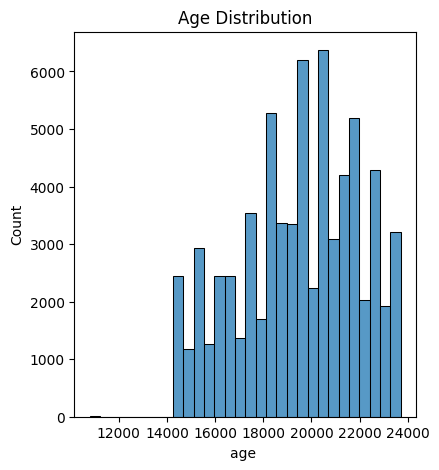

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data=df, x="age ", bins=30)
plt.title('Age Distribution')

In [ ]:
df.columns

Index(['id', 'age ', 'gender', 'height ', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'glucose', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

Text(0.5, 1.0, 'Target Variable Distribution')

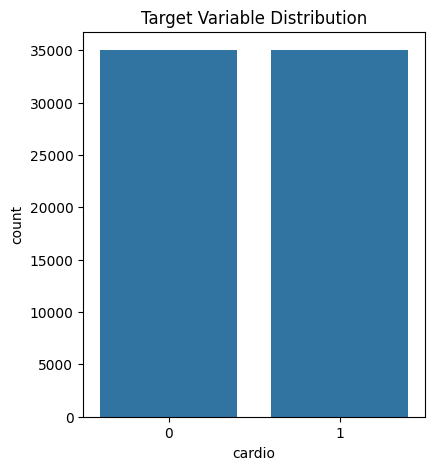

In [ ]:
plt.figure(figsize=(15, 5))
# Target variable distribution
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='cardio')
plt.title('Target Variable Distribution')

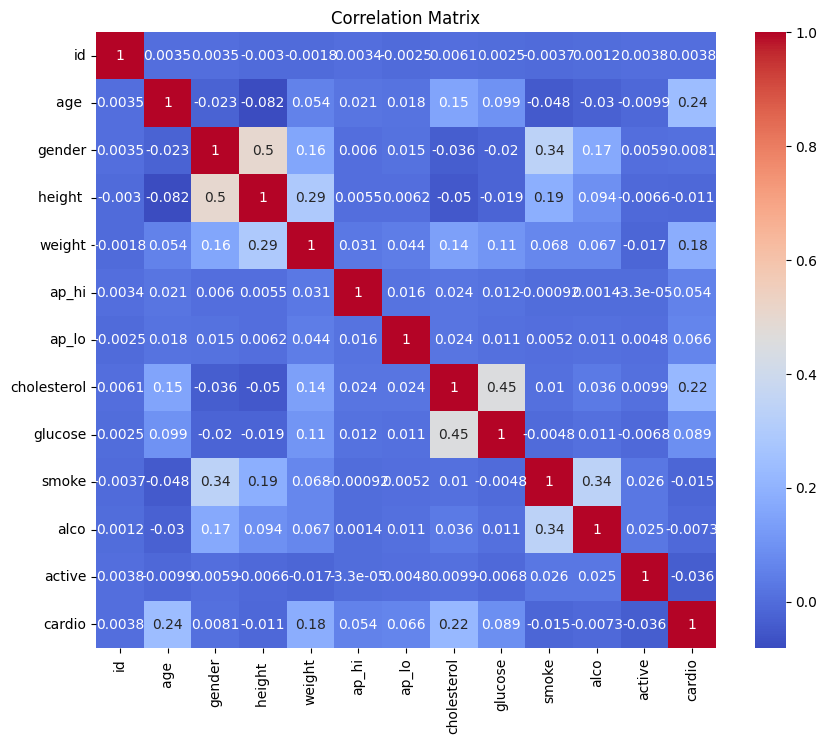

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Feature preprocessing
# Assuming 'cardio' is your target variable
X = df.drop(['cardio', 'id'], axis=1)
y = df['cardio']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Model Building and Training:
# python
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.show()

    return model




Evaluating Logistic Regression:
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6988
           1       0.75      0.68      0.71      7012

    accuracy                           0.72     14000
   macro avg       0.73      0.72      0.72     14000
weighted avg       0.73      0.72      0.72     14000



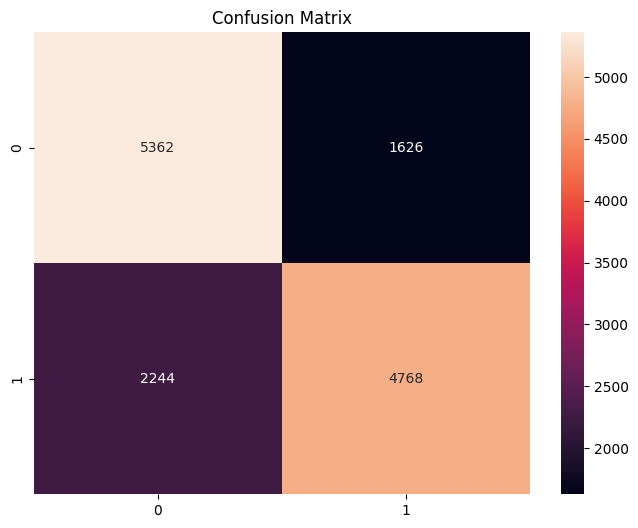


Evaluating Decision Tree:
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.62      0.63      6988
           1       0.63      0.64      0.63      7012

    accuracy                           0.63     14000
   macro avg       0.63      0.63      0.63     14000
weighted avg       0.63      0.63      0.63     14000



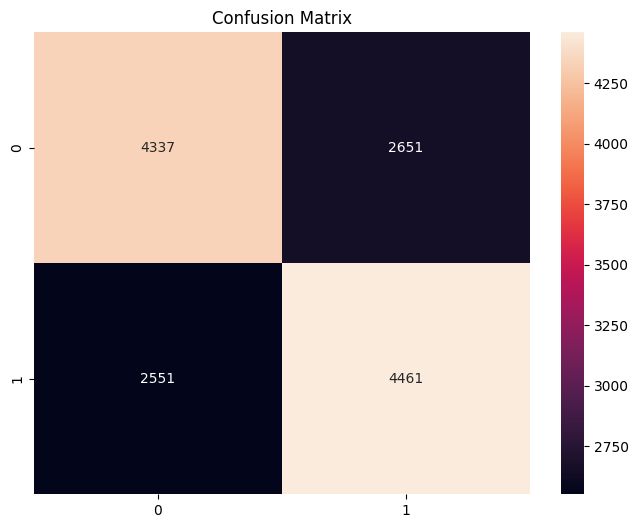


Evaluating Random Forest:
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      6988
           1       0.72      0.70      0.71      7012

    accuracy                           0.71     14000
   macro avg       0.71      0.71      0.71     14000
weighted avg       0.71      0.71      0.71     14000



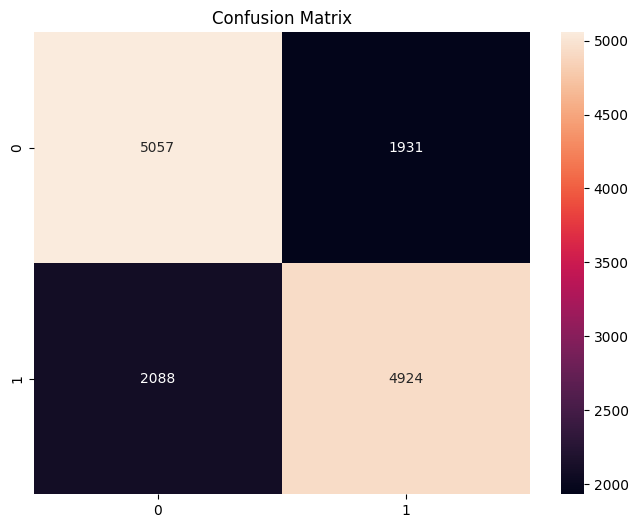


Evaluating SVM:
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      6988
           1       0.75      0.70      0.72      7012

    accuracy                           0.73     14000
   macro avg       0.73      0.73      0.73     14000
weighted avg       0.73      0.73      0.73     14000



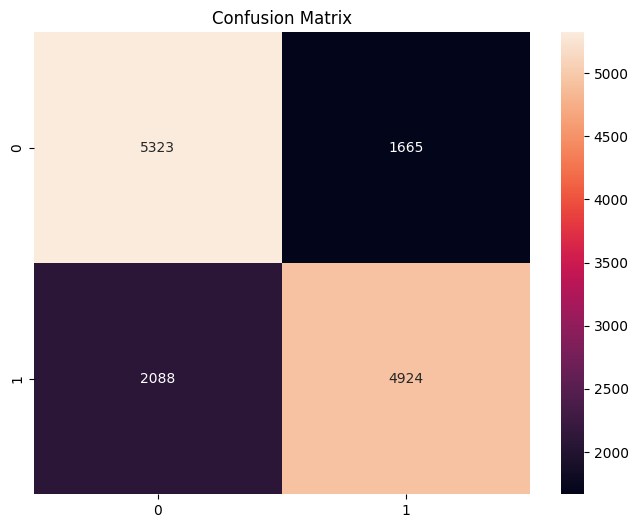

In [ ]:
# Create and evaluate different models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"\nEvaluating {name}:")
    results[name] = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

<Axes: xlabel='importance', ylabel='feature'>

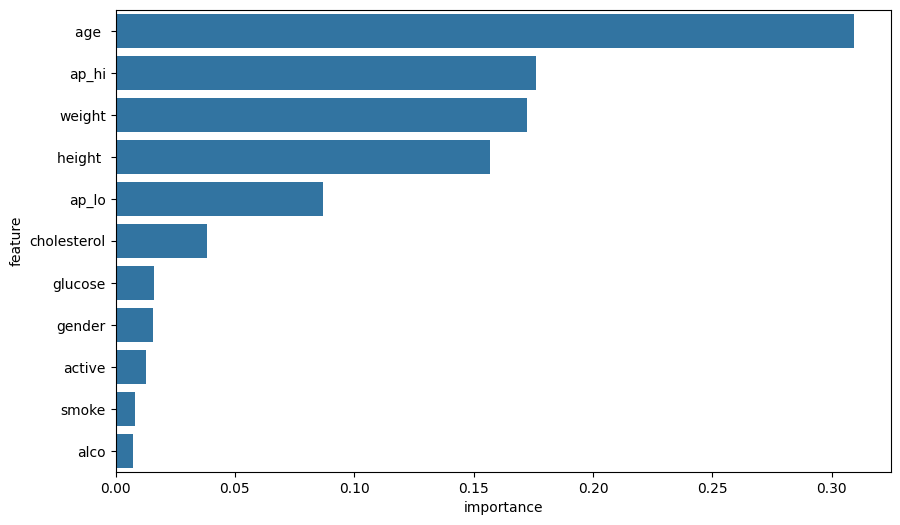

In [ ]:
# 5. **Feature Importance Analysis** (for Random Forest):

# Get feature importance from Random Forest
rf_model = results['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')

<Axes: xlabel='importance', ylabel='feature'>

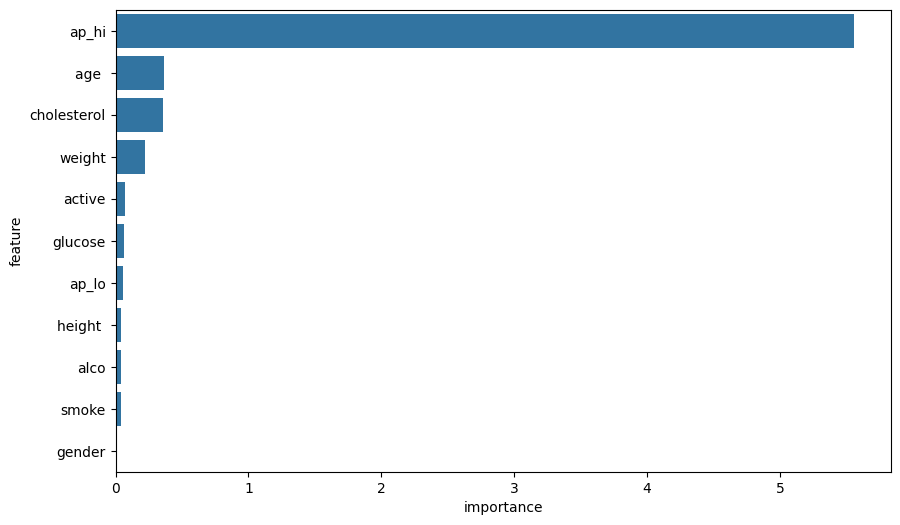

In [ ]:
# 5. **Feature Importance Analysis** (for Random Forest):

# Get feature importance from Random Forest
lr_model = results['Logistic Regression']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(lr_model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')

Saving reorganized_cardio_data.csv to reorganized_cardio_data.csv
First few rows of the dataset:
   id   age   gender  height   weight  ap_hi  ap_lo  cholesterol  glucose  \
0   0  18393       2      168    62.0    110     80            1        1   
1   1  20228       1      156    85.0    140     90            3        1   
2   2  18857       1      165    64.0    130     70            3        1   
3   3  17623       2      169    82.0    150    100            1        1   
4   4  17474       1      156    56.0    100     60            1        1   

   smoke  alco  active  cardio  
0      0     0       1       0  
1      0     0       1       1  
2      0     0       0       1  
3      0     0       1       1  
4      0     0       0       0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  

KeyError: 'age'

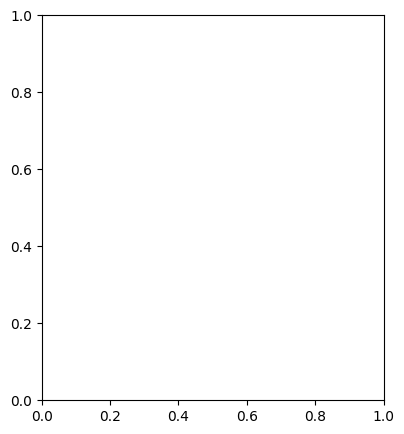

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from google.colab import files
import pandas as pd
uploaded = files.upload()

df = pd.read_csv('reorganized_cardio_data.csv')
print("First few rows of the dataset:")
print(df.head())

# Check basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Display basic statistics
print("\nBasic statistics:")
print(df.describe())

# 3. **Data Preprocessing and Exploration**:
plt.figure(figsize=(15, 5))

# Age distribution
plt.subplot(1, 3, 1)
sns.histplot(df['age'], bins=30)
plt.title('Age Distribution')

# Target variable distribution
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='cardio')
plt.title('Target Variable Distribution')

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature preprocessing
# Assuming 'cardio' is your target variable
X = df.drop('cardio', axis=1)
y = df['cardio']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

4. # Model Building and Training:
python
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.show()

    return model

# Create and evaluate different models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"\nEvaluating {name}:")
    results[name] = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

# 5. **Feature Importance Analysis** (for Random Forest):

# Get feature importance from Random Forest
rf_model = results['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
# ```python
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

#for model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


from google.colab import files
import pandas as pd
uploaded = files.upload()

df = pd.read_csv('reorganized_cardio_data.csv')
print("First few rows of the dataset:")
print(df.head())

# Check basic information about the dataset
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Display basic statistics
print("\nBasic statistics:")
print(df.describe())

# 3. **Data Preprocessing and Exploration**:
plt.figure(figsize=(15, 5))

# Age distribution
plt.subplot(1, 3, 1)
sns.histplot(df['age'], bins=30)
plt.title('Age Distribution')

# Target variable distribution
plt.subplot(1, 3, 2)
sns.countplot(data=df, x='cardio')
plt.title('Target Variable Distribution')

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Feature preprocessing
# Assuming 'cardio' is your target variable
X = df.drop('cardio', axis=1)
y = df['cardio']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Model Building and Training:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Print classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.show()

    return model

# Create and evaluate different models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42)
}

# Train and evaluate each model
results = {}
for name, model in models.items():
    print(f"\nEvaluating {name}:")
    results[name] = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)

# 5. **Feature Importance Analysis** (for Random Forest):

# Get feature importance from Random Forest
rf_model = results['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Feature Importance')
plt.show()

# 6. **Make Predictions on New Data**:
# Function to make predictions on new data
def predict_cardiovascular_disease(model, new_data):
    # Scale the new data
    new_data_scaled = scaler.transform(new_data)

    # Make prediction
    prediction = model.predict(new_data_scaled)
    probability = model.predict_proba(new_data_scaled)

    return prediction, probability

# Example of using the best model (assuming Random Forest performed best)
best_model = results['Random Forest']

# Example new data (adjust features according to your dataset)
# Example:  Assuming 'age', 'gender', etc., are defined elsewhere
#  Replace placeholders with actual variable values
#new_patient = pd.DataFrame([[age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active]],
#                          columns=X.columns)
#prediction, probability = predict_cardiovascular_disease(best_model, new_patient)
#print(f"Prediction: {'Positive' if prediction[0] == 1 else 'Negative'}")
#print(f"Probability: {probability[0][1]:.2f}")


# 7. **Save the Model**:

# Save the best model
import joblib

joblib.dump(best_model, 'cardiovascular_disease_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

# 8. **Model Improvement Suggestions**:

# Cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                         param_grid,
                         cv=5,
                         n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
# ```
# ```python
# Function to make predictions on new data
def predict_cardiovascular_disease(model, new_data):
    # Scale the new data
    new_data_scaled = scaler.transform(new_data)

    # Make prediction
    prediction = model.predict(new_data_scaled)
    probability = model.predict_proba(new_data_scaled)

    return prediction, probability

# Example of using the best model (assuming Random Forest performed best)
best_model = results['Random Forest']

# Example new data (adjust features according to your dataset)
new_patient = pd.DataFrame([[age, gender, height, weight, ap_hi, ap_lo, cholesterol, gluc, smoke, alco, active]],
                          columns=X.columns)

prediction, probability = predict_cardiovascular_disease(best_model, new_patient)
print(f"Prediction: {'Positive' if prediction[0] == 1 else 'Negative'}")
print(f"Probability: {probability[0][1]:.2f}")
# ```

# 7. **Save the Model**:

# Save the best model
import joblib

joblib.dump(best_model, 'cardiovascular_disease_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

# 8. **Model Improvement Suggestions**:

# Cross-validation
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Example for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                         param_grid,
                         cv=5,
                         n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
# ```

In [ ]:
# for ensemble
#from google.colab import files
import pandas as pd
uploaded = files.upload()

df = pd.read_csv('cardio_train.csv')
print("First few rows of the dataset:")
print(df.head())


# Check basic information about the dataset
print("\nDataset Info:")
print(df.info())


# # Check basic information about the dataset
print("\nDataset Info:")
print(df.info())

# # Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# # Display basic statistics
print("\nBasic statistics:")
print(df.describe())

In [ ]:
model1 = SVC(probability=True)
model2 = RandomForestClassifier()
model3 = DecisionTreeClassifier()

In [ ]:
# import GradientBoosting
from sklearn.ensemble import GradientBoostingClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=4, min_samples_split=10, random_state=42 )
gb =   GradientBoostingClassifier(n_estimators=100, random_state=42)
lr =  LogisticRegression(random_state= 42)

In [ ]:
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('gb', gb), ('lr', lr)],
    voting = 'hard'
)

In [ ]:
model

In [ ]:
#combine base models

ensemble_model = VotingClassifier(estimators=[
    ('svc', model1),
    ('rf', model2),
    ('dt', model3)
], voting='soft')

In [ ]:
 df = pd.read_csv('reorganized_cardio_data.csv')
print("First few rows of the dataset:")
print(df.head())
# remove the (print)

First few rows of the dataset:
   id   age   gender  height   weight  ap_hi  ap_lo  cholesterol  glucose  \
0   0  18393       2      168    62.0    110     80            1        1   
1   1  20228       1      156    85.0    140     90            3        1   
2   2  18857       1      165    64.0    130     70            3        1   
3   3  17623       2      169    82.0    150    100            1        1   
4   4  17474       1      156    56.0    100     60            1        1   

   smoke  alco  active  cardio  
0      0     0       1       0  
1      0     0       1       1  
2      0     0       0       1  
3      0     0       1       1  
4      0     0       0       0  


In [ ]:
# Outside the function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
def load_data():
    data = pd.read_csv('reorganized_cardio_data.csv')
    return data

data = load_data()

In [ ]:


# Separate features (X) and target (y)
X = data.iloc[:, :-1]  # All columns except the last
y = data.iloc[:, -1]   # The last column

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



In [ ]:
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('svc', SVC(probability=True)),
                             ('rf', RandomForestClassifier()),
                             ('dt', DecisionTreeClassifier())],
                 voting='soft')

In [ ]:
voting_clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=10,
                                                     min_samples_leaf=4,
                                                     min_samples_split=10,
                                                     random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(random_state=42)),
                             ('lr', LogisticRegression(random_state=42))])

In [ ]:
predictions = ensemble_model.predict(X_test)

# predictions = ensemble_model.predict(X_new_scaled)

# ensemble_model.fit(X_train_scaled, y_train)
# accuracy = ensemble_model.score(X_test_scaled, y_test)
# print(f"Ensemble Model Accuracy: {accuracy * 100:.2f}%")


NotFittedError: This VotingClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# predictions = ensemble_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, predictions))
print("\nClassification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.6446428571428572

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.64      0.64      6988
           1       0.64      0.65      0.65      7012

    accuracy                           0.64     14000
   macro avg       0.64      0.64      0.64     14000
weighted avg       0.64      0.64      0.64     14000



In [ ]:
# Hyper parameter tunning
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross_validation accuracy: {grid_search.best_score_}")

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best cross_validation accuracy: 0.89625


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform

param_dist = {
    'C': uniform(0.1, 10),
     'kernel': ['linear', 'rbf', 'poly'],
      'gamma': ['scale', 'auto']
}

svm = SVC()
random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation accuracy: {random_search.best_score_}")



Best parameters: {'C': 0.17066305219717406, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.8724999999999999


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

def load_and_preprocess_data(X, y):
    """
    Splits data into training and testing sets
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    return X_train, X_test, y_train, y_test

def train_and_evaluate_models(X_train, X_test, y_train, y_test):
    """
    Trains and evaluates multiple ensemble models
    """
    # Initialize base models
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
    lr = LogisticRegression(random_state=42)

    # Create voting classifier
    voting_clf = VotingClassifier(
        estimators=[
            ('rf', rf),
            ('gb', gb),
            ('lr', lr)
        ],
        voting='soft'
    )

    # Dictionary to store models
    models = {
        'Random Forest': rf,
        'Gradient Boosting': gb,
        'Voting Classifier': voting_clf
    }

    # Train and evaluate each model
    results = {}
    for name, model in models.items():
        # Train model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)

        # Perform cross-validation
        cv_scores = cross_val_score(model, X_train, y_train, cv=5)

        # Store results
        results[name] = {
            'Accuracy': accuracy,
            'CV Mean': cv_scores.mean(),
            'CV Std': cv_scores.std()
        }

        print(f"\nResults for {name}:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Cross-validation score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred))

    return models, results

# Example usage:
if __name__ == "__main__":
    # Generate sample data
    from sklearn.datasets import make_classification
    X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

    # Process data
    X_train, X_test, y_train, y_test = load_and_preprocess_data(X, y)

    # Train and evaluate models
    models, results = train_and_evaluate_models(X_train, X_test, y_train, y_test)

    # Display results in a DataFrame
    results_df = pd.DataFrame(results).T
    print("\nSummary of Results:")
    print(results_df)


Results for Random Forest:
Accuracy: 0.9000
Cross-validation score: 0.8912 (+/- 0.0579)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.90        93
           1       0.95      0.86      0.90       107

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200


Results for Gradient Boosting:
Accuracy: 0.9150
Cross-validation score: 0.8912 (+/- 0.0683)

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91        93
           1       0.97      0.87      0.92       107

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.92       200


Results for Voting Classifier:
Accuracy: 0.8900
Cross-validation score: 0.8925 (+/- 0.0533)

Classification Report: